# Python для Анализа Данных

# Лекция 6: Обработка данных с Pandas I

**Автор** Полина Полунина

По материалам Элен Теванян 

**tg:** @ppolunina

## Pandas. Загрузка библиотек

 -  <a href="http://pandas.pydata.org/">Pandas</a> - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [39]:
import pandas as pd

В пандас есть две структуры данных:
- Series: одномерный массив с именованными индексами (чаще всего, данные одного типа)
- DataFrame: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов

Оба типа можно создавать вручную с помощью функций из самой библиотеки:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

- **data** - данные, которые надо записать в структуру
- **index** - индексы строк
- **columns** - названия столбцов
- **dtype** - тип данных

Кроме data, остальные параметры опциональны


Мы, конечно, можем сами создавать датафреймы!

Например, кто-то нашел нам кусок данных и просит воспроизвести этот датасет:

<img src="https://i.imgur.com/FUCGiKP.png">

Давайте разберемся, что здесь, что и запишем в известную нам конструкцию - листы. 

In [42]:
columns = ['country', 'province', 'region_1', 'region_2']
index = [0, 1, 10, 100]
data = [['Italy', 'Sicily & Sardinia', 'Etna', 'NaN'], 
        ['Portugal', 'Douro', 'NaN', 'NaN'],
       ['US', 'California', 'Napa Valley', 'Napa'],
       ['US', 'New York', 'Finger Lakes', 'Finger Lakes']]

А теперь соберем в датафрейм

In [40]:
pd.DataFrame?

In [43]:
df = pd.DataFrame(data, columns = columns, index = index)
df

,country,province,region_1,region_2
0,Italy,Sicily & Sardinia,Etna,NaN
1,Portugal,Douro,NaN,NaN
10,US,California,Napa Valley,Napa
100,US,New York,Finger Lakes,Finger Lakes


### Загрузка и запись данных

Правда в том, что мы не будем так жестоко к себе и вручную вбивать данные не будем. А будем загружать из файла. 


- Функции типа **pd.read_формат** и **pd.to_формат**
считывают и записывают данные соответственно. <br /> Полный список можно найти в документации:
http://pandas.pydata.org/pandas-docs/stable/io.html

Я лично перестала пользоваться экселем даже для беглого смотра данных, Pandas грузит гигабайтные файлы в худшем случае минуту-полторы. 

Научимся считывать данные в формате csv (comma separated value) функцией:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>: 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - колонка, из которой надо взять названия строк


In [46]:
data = pd.read_csv('dpo_1-2_winemag-data_first150k.csv')


### Смотрим, что загрузилось

In [47]:
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Что-то не то с первым столбцом, немного поправим

In [48]:
data = pd.read_csv('dpo_1-2_winemag-data_first150k.csv', index_col = 0)

In [49]:
data.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


### Смотрим, что загрузилось:

- Посчитаем, сколько записей
- Посмотрим, какого типа данные
- Проверим, есть ли пропуски

Посчитаем, сколько записей в данных.

- Помогает метод **count()**. Это значит, что к любому датафрейму стучимся в гости с этим методом:

In [50]:
data.count()

country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [51]:
data.shape

(150930, 10)

- Метод info() заодно показывает, какого типа данные в столбцах

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [53]:
data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Начнем проверять на пропуски! 

- .isnull() - выдает табличку, где False - ячейка заполнена, True - ячейка пуста :( Ближайшая родня - isna()

In [57]:
data.isnull().sum().sum() / data.size

0.11560127211290001

In [61]:
data.isna().sum().sum() / data.size

0.11560127211290001

Немного опережу события и покажу, как оценить масштаб бедствия визуально. 

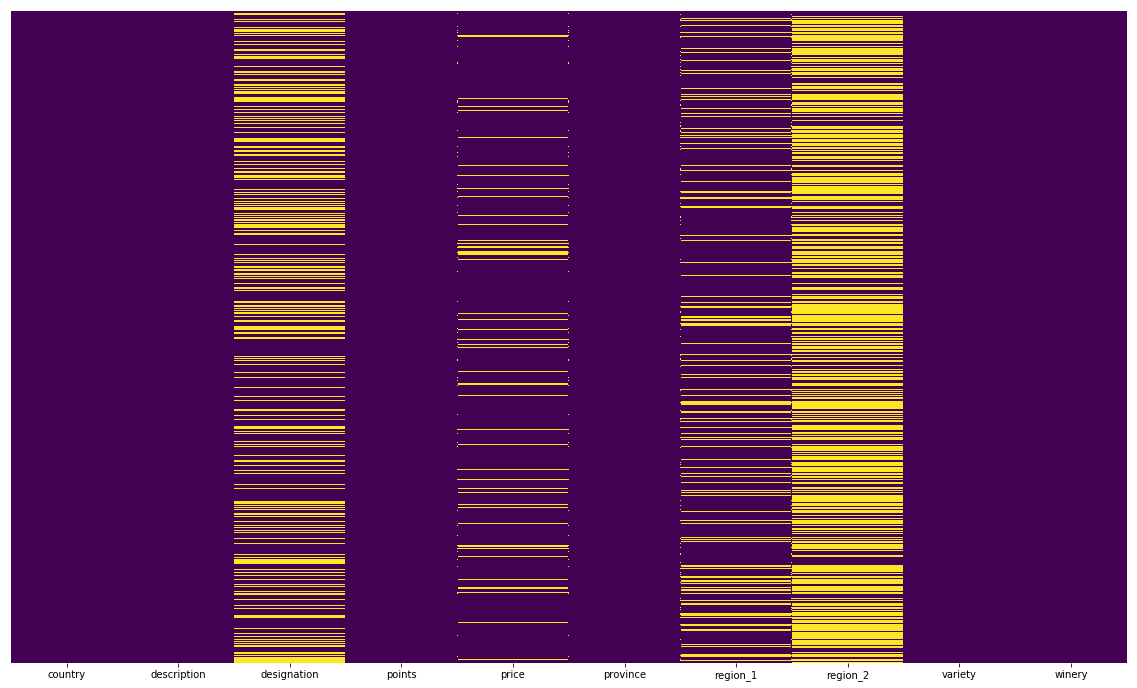

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Что с ним делать?

Выбора не очень много: <br>

1) Удалять: 
- dropna(axis=0, how='any'): axis = 0 - удаляем построчно, axis = 1 выкидываем столбец; how ='any' - выкидываем, если есть хотя бы одна ячейка пустая. how = 'all' - выкидываем, если есть полностью пустая строка или столбец

2) Вставлять информацию самим:
- fillna() - это отдельное искусство, как заполнять. 


Пока не будем трогать данные. 

### Описательные статистики

Теперь посмотрим, а что содержательно у нас есть на руках. 

Глазами просматривать не будем, а попросим посчитать основные описательные статистики. Причем сразу все :) 

- describe() - метод, который возвращает табличку с описательными статистиками. В таком виде считает все для числовых столбцов

In [67]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


Немножко магии, и для нечисловых данные тоже будут свои описательные статистики. 

In [68]:
data.describe(include=['O'])

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


### Срезы данных

Допустим, нам не нужен датасет, а только определенные столбцы или строки или столбцы и строки. 


Как делать?
Помним, что:
- у столбцов есть названия
- у строк есть названия
- если нет названий, то они пронумерованы с нуля

Основываясь на этой идее, мы начнем отбирать данные.

In [69]:
data.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


#### Отбираем по столбцам. Версия 1. 

In [73]:
data['price'].head()

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

In [74]:
data[['price','country']].head()

,price,country
0,235.0,US
1,110.0,Spain
2,90.0,US
3,65.0,US
4,66.0,France


#### Отбираем по  строкам. Версия 1. 

Были бы названия - вместо цифр подставили бы названия и все вышло бы также :)

In [81]:
data[::5]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
20,US,Heitz has made this stellar rosé from the rare...,Grignolino,95,24.0,California,Napa Valley,Napa,Rosé,Heitz
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
40,Spain,Earthy plum and cherry aromas score points for...,Amandi,90,17.0,Galicia,Ribeira Sacra,NaN,Mencía,Don Bernardino
45,Italy,"A blend of 90% Sangiovese and 10% Canaiolo, th...",Vigneto Odoardo Beccari Riserva,90,30.0,Tuscany,Chianti Classico,NaN,Red Blend,Vignavecchia


In [ ]:
data[:1]

#### Отбор по столбцам. Версия 2. Все еще по названиям 

In [84]:
data.loc[4:7, ['price', 'points']]

,price,points
4,66.0,95
5,73.0,95
6,65.0,95
7,110.0,95


#### Отбор по  строкам. Версия 2. Все еще по названиям 

In [87]:
data.loc[:5,:]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


#### Отбор по строчкам и столбцам

In [ ]:
data.loc[0:5,['price', 'country']]

#### Отбор по строчкам и столбцам. Версия 3. По номеру строк и столбцов

In [90]:
data.iloc[::5, [5,7]].head()

,province,region_2
0,California,Napa
5,Northern Spain,NaN
10,Northeastern Italy,NaN
15,Oregon,Willamette Valley
20,California,Napa


#### Отбор с условиями

Так, а если мне нужны вина дороже $15 долларов? Как быть?

In [93]:
#задаем маску
mask = data['price'] > 15

In [94]:
#и отбираем данные

temp = data[mask]
temp

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [97]:
data[(data.price > 15) & ((data.country == 'US') | (data.country == 'France'))]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene


### Мультииндексация

In [99]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [98]:
data_ = data.groupby(['country', 'province']).count()
data_.head()

description  designation  points  price  region_1  \
country   province                                                              
Albania   Mirditë                     2            0       2      2         0   
Argentina Mendoza Province         4742         3278    4742   4706      4738   
          Other                     889          658     889    881       889   
Australia Australia Other           553          302     553    551       553   
          New South Wales           246          144     246    244       246   

                            region_2  variety  winery  
country   province                                     
Albania   Mirditë                  0        2       2  
Argentina Mendoza Province         0     4742    4742  
          Other                    0      889     889  
Australia Australia Other          0      553     553  
          New South Wales          0      246     246

In [25]:
data_.loc['US'].head()

,Unnamed: 0,description,designation,points,price,region_1,region_2,variety,winery
province,,,,,,,,,
America,27,27,22,27,27,0,0,27,27
Arizona,39,39,28,39,38,39,0,39,39
California,44508,44508,28805,44508,44356,44508,44271,44508,44508
Colorado,30,30,8,30,30,30,0,30,30
Connecticut,2,2,2,2,2,2,0,2,2


In [27]:
data_.loc['US', 'California']

Unnamed: 0     44508
description    44508
designation    28805
points         44508
price          44356
region_1       44508
region_2       44271
variety        44508
winery         44508
Name: (US, California), dtype: int64

In [100]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


#### Как изменять значения в табличке

In [103]:
data.iloc[0,1] = 'kotiki'
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,kotiki,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [114]:
data.loc[data.country == 'US', 'region_2'] = 'kot'
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,kotiki,Martha's Vineyard,96,235.0,California,Napa Valley,kot,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,kot,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,kot,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Конкатенация

In [119]:
a = [0, 1, 2, 3]
b = [4, 5, 6, 7, 234, 23]
b + a + b

[4, 5, 6, 7, 234, 23, 0, 1, 2, 3, 4, 5, 6, 7, 234, 23]

In [120]:
data_1 = data[0:15]
data_2 = data[15:30]

In [122]:
data_2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,kot,Chardonnay,Bergström
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,kot,Cabernet Sauvignon,Hall
17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,kot,Pinot Noir,Gary Farrell


In [124]:
pd.concat([data_1, data_2])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,kotiki,Martha's Vineyard,96,235.0,California,Napa Valley,kot,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,kot,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,kot,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,kot,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,kot,Pinot Noir,Blue Farm


In [33]:
data_1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Сводные таблицы

In [125]:
data.pivot_table(values=['price', 'points'], index=['country'])

,points,price
country,,
Albania,88.000000,20.000000
Argentina,85.996093,20.794881
Australia,87.892475,31.258480
Austria,89.276742,31.192106
Bosnia and Herzegovina,84.750000,12.750000
Brazil,83.240000,19.920000
Bulgaria,85.467532,11.545455
Canada,88.239796,34.628866
Chile,86.296768,19.344780


In [126]:
'kotiki' + '_' + 'horoshie'

'kotiki_horoshie'

### Посмотрим на данные еще раз! Картинками :)

Уменьшаем стресс и не идем знакомиться с бибилотеками для визуалиации, потому что...

В библиотеке pandas есть инструмент для рисования! 

- df.plot() - метод для рисования

Давайте попробуем  просто вызвать без всего и посмотрим, что выйдет.

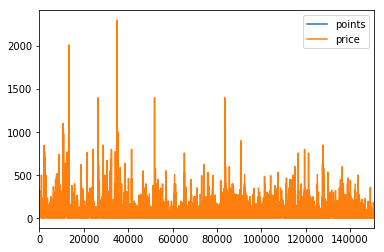

In [127]:
data.plot()

Не очень.

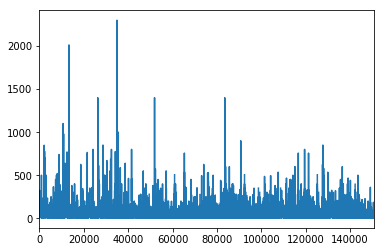

In [128]:
data['price'].plot()

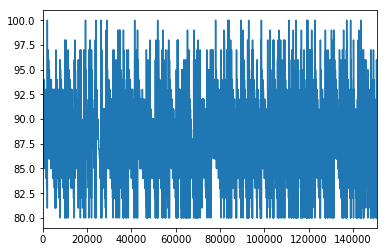

In [129]:
data['points'].plot()

Что-то все не очень. Давайте попробуем добиться какой-нибудь разумной визуализации столбца points.

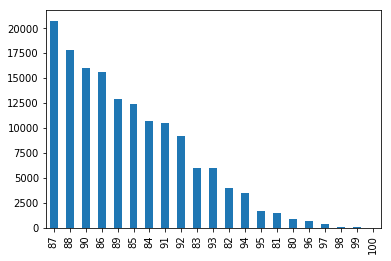

In [130]:
data['points'].value_counts().plot(kind='bar')

А что это новое за value_counts()? (Без него не советую запускать код выше, будет больно)

In [131]:
data['points'].value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

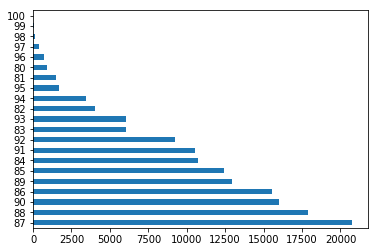

In [132]:
data['points'].value_counts().plot(kind='barh')

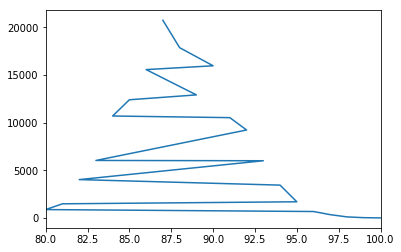

In [133]:
data['points'].value_counts().plot(kind='line')

Опять некрасиво. Потому что у нас индексы не отсортированы при value_counts()!

Поправим

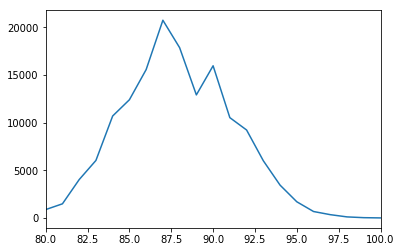

In [134]:
data['points'].value_counts().sort_index().plot(kind='line')

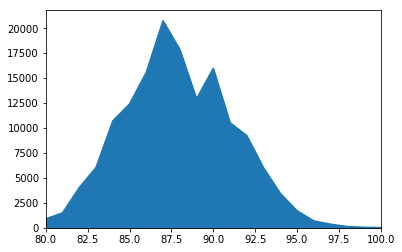

In [135]:
data['points'].value_counts().sort_index().plot(kind='area')

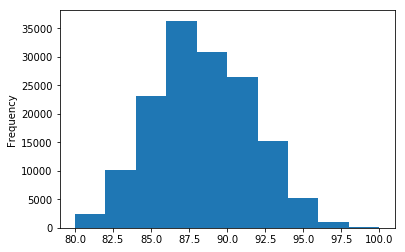

In [136]:
data['points'].sort_index().plot(kind='hist')

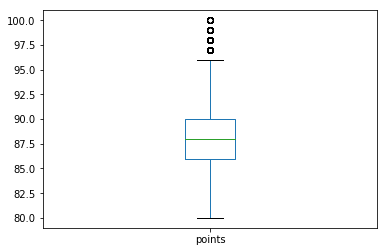

In [137]:
data['points'].plot(kind='box')

Ну вроде про один столбец разобрались. А как красиво сразу про все столбцы нарисовать?

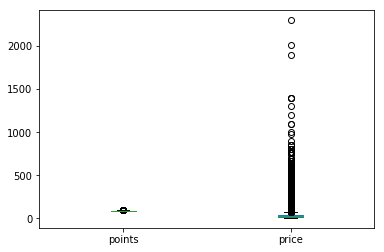

In [138]:
data.plot(kind ='box')

points       AxesSubplot(0.125,0.125;0.352273x0.755)
price     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

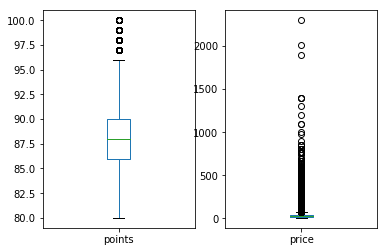

In [139]:
data.plot(kind='box', subplots=True)

А совместно как распределены цены и оценки сомелье?

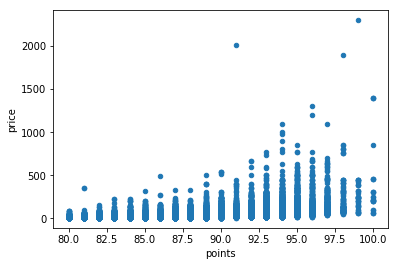

In [140]:
 data.plot(x='points', y='price', kind='scatter')

In [12]:
wine_counts = pd.read_csv('dpo_1-2_top-five-wine-score-counts.csv')
wine_counts.head(3)

,points,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
0,80,5.0,87.0,68.0,36.0,72.0
1,81,18.0,159.0,150.0,83.0,107.0
2,82,72.0,435.0,517.0,295.0,223.0


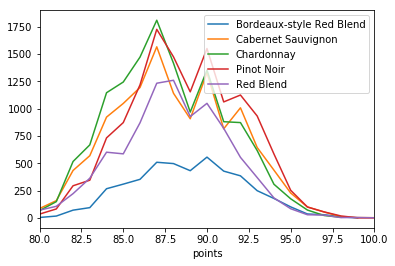

In [13]:
wine_counts.plot.line(x='points')

In [ ]:
wine_counts.plot.area(x='points')

In [ ]:
wine_counts.plot.bar(x='points', stacked=True)